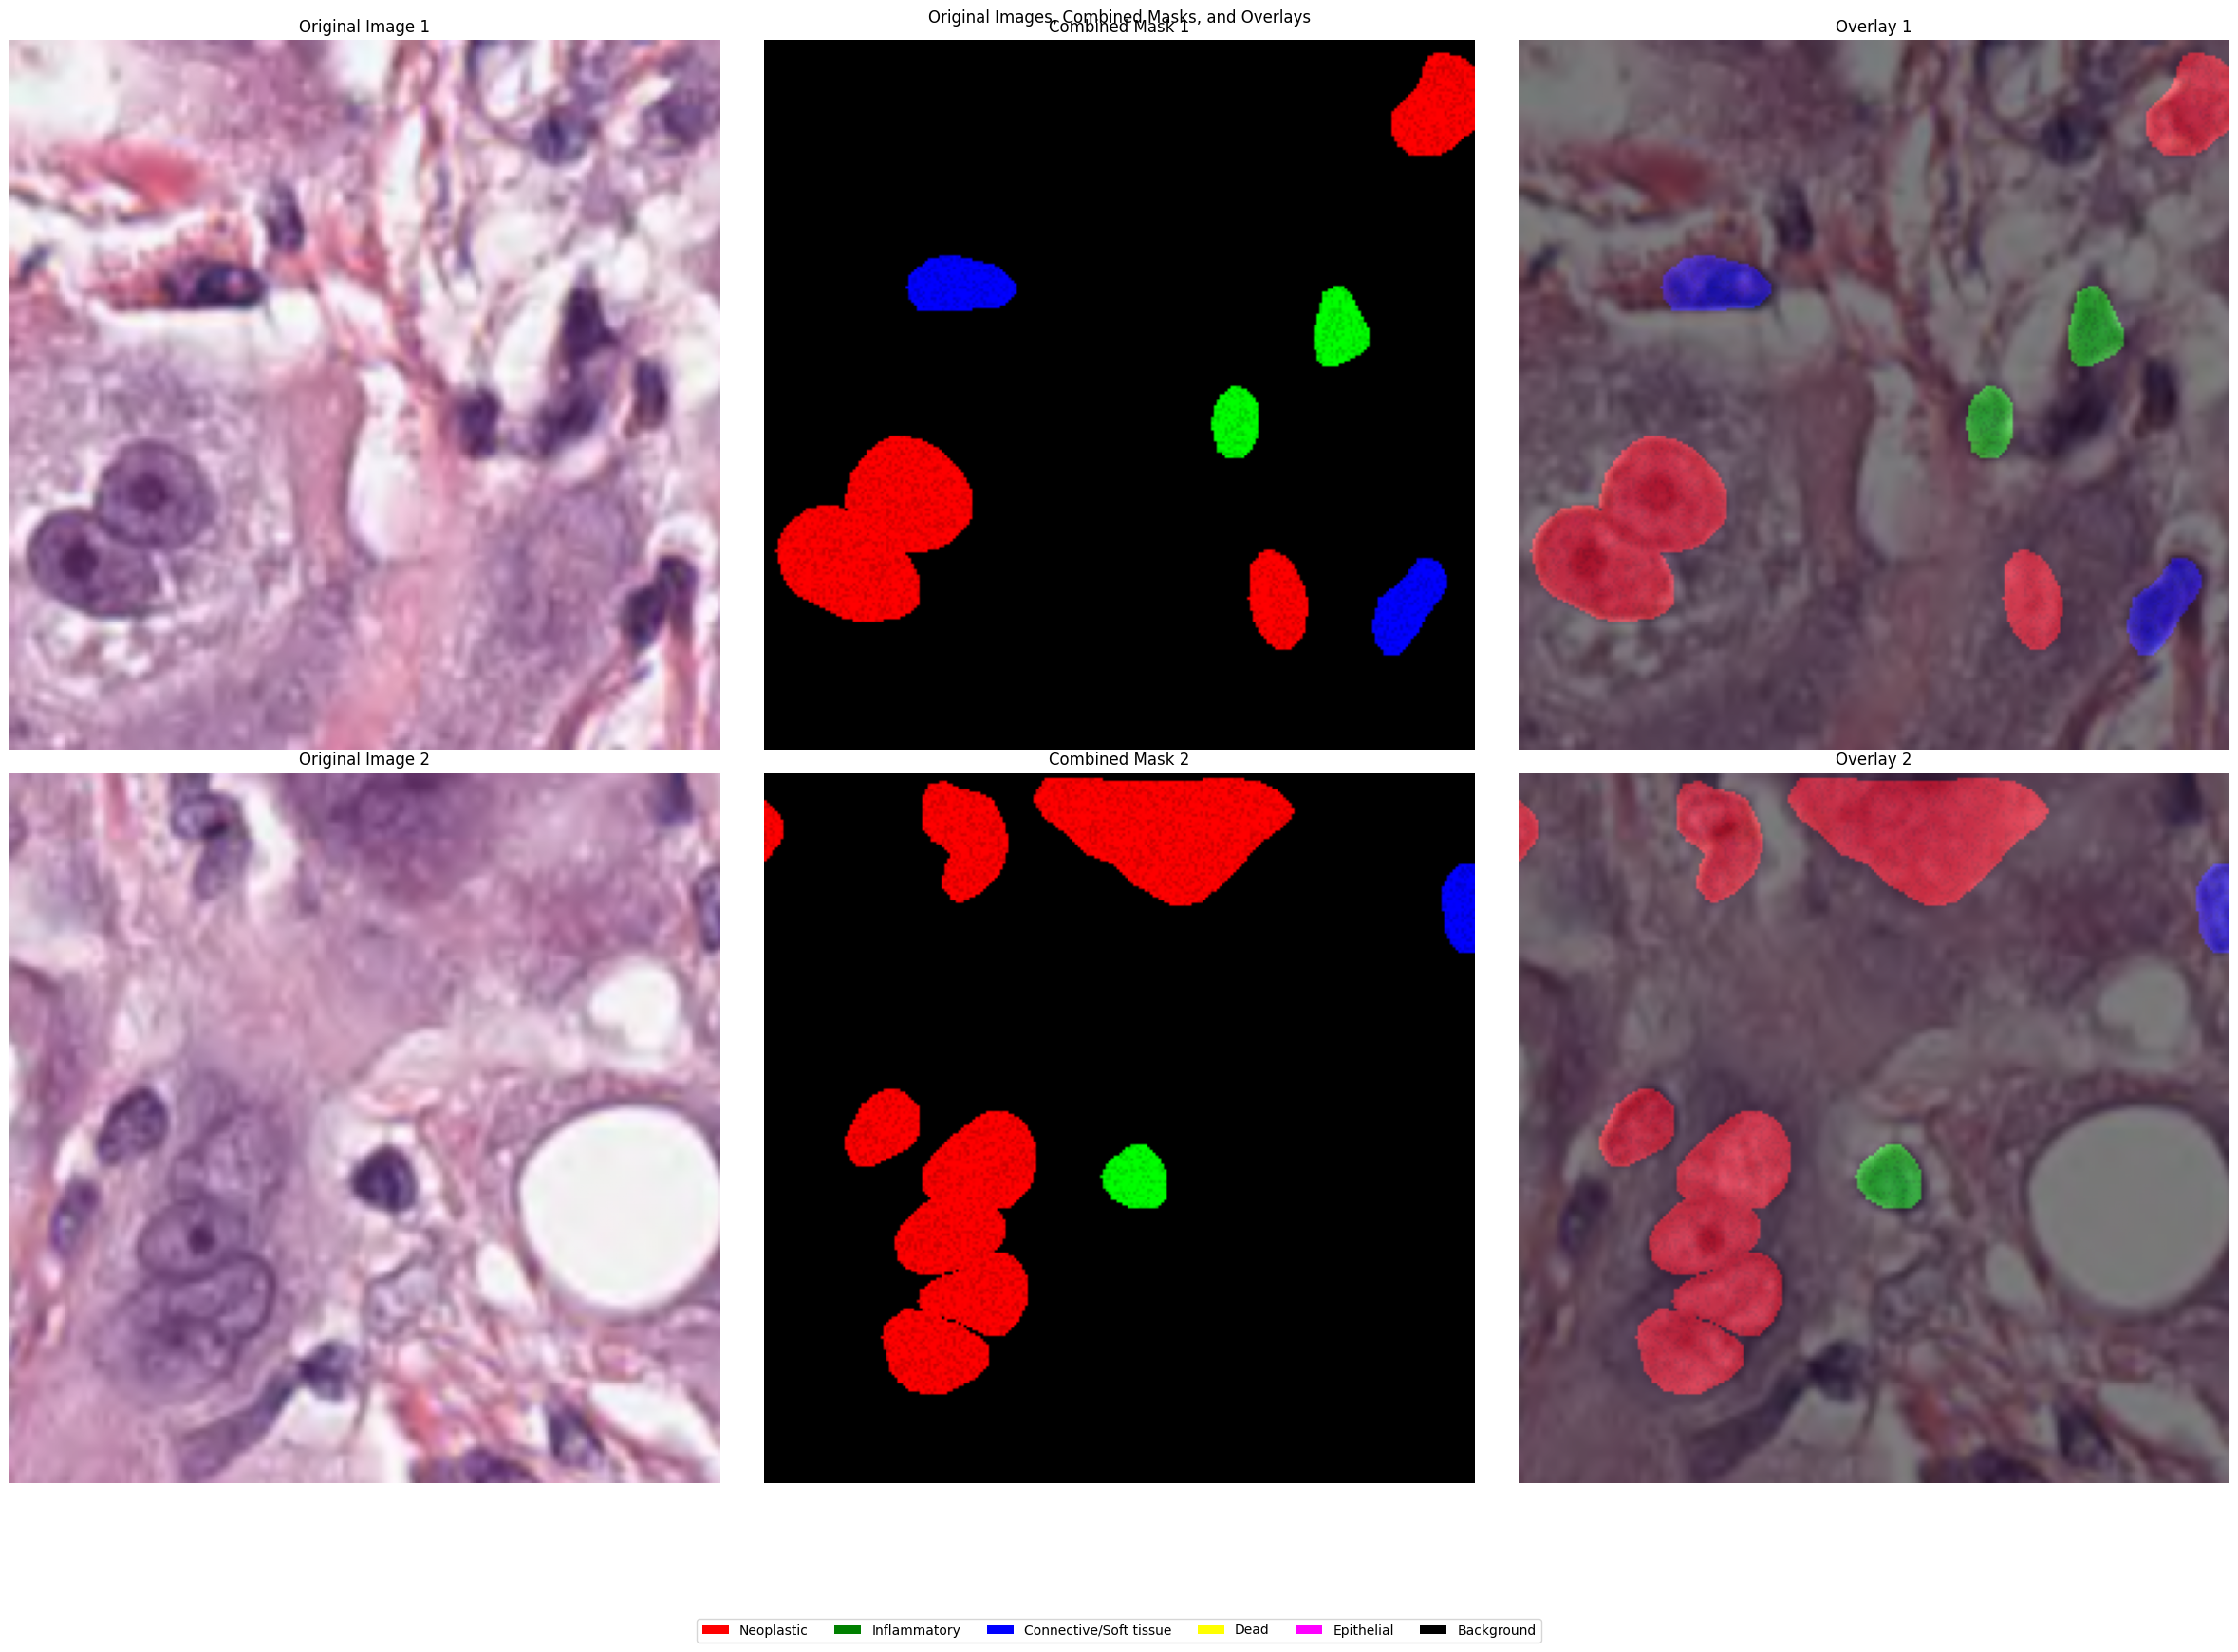

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage

def color_jitter(mask, color, jitter_range=0.2):
    jittered = np.random.uniform(1-jitter_range, 1+jitter_range, size=mask.shape[:2])
    return np.clip(mask[:,:,np.newaxis] * color * jittered[:,:,np.newaxis], 0, 1)

def create_colored_mask(mask):
    colors = [
        [1, 0, 0],    # Red (Neoplastic)
        [0, 1, 0],    # Green (Inflammatory)
        [0, 0, 1],    # Blue (Connective/Soft tissue)
        [1, 1, 0],    # Yellow (Dead)
        [1, 0, 1],    # Magenta (Epithelial)
    ]
    
    colored_mask = np.zeros((*mask.shape[:2], 3))
    for i in range(5):  # 5 cell classes
        cell_mask = mask[..., i] > 0
        labeled, num_features = ndimage.label(cell_mask)
        for j in range(1, num_features+1):
            cell = (labeled == j)
            colored_mask += color_jitter(cell, colors[i])
    
    # Set background to black
    background = mask[..., 5] > 0
    colored_mask[background] = [0, 0, 0]
    
    # Normalize non-background areas
    non_background = ~background
    if np.any(non_background):
        colored_mask[non_background] /= np.max(colored_mask[non_background])
    
    return colored_mask

def overlay_mask_on_image(image, colored_mask, alpha=0.5):
    return image * (1 - alpha) + colored_mask * alpha

def visualize_samples(image_file, mask_file, num_samples=2):
    images = np.load(image_file, allow_pickle=True)
    masks = np.load(mask_file, allow_pickle=True)
    
    class_names = ['Neoplastic', 'Inflammatory', 'Connective/Soft tissue', 'Dead', 'Epithelial', 'Background']
    colors = ['red', 'green', 'blue', 'yellow', 'magenta', 'black']

    fig, axes = plt.subplots(num_samples, 3, figsize=(24, 8*num_samples))
    fig.suptitle('Original Images, Combined Masks, and Overlays')

    for i in range(num_samples):
        image = images[i]
        mask = masks[i]

        # Normalize image if necessary
        if image.max() > 1:
            image = image / 255.0

        # Create colored mask
        colored_mask = create_colored_mask(mask)

        # Create overlay
        overlay = overlay_mask_on_image(image, colored_mask)

        # Original Image
        axes[i, 0].imshow(image)
        axes[i, 0].set_title(f'Original Image {i+1}')
        axes[i, 0].axis('off')
        
        # Combined Mask
        axes[i, 1].imshow(colored_mask)
        axes[i, 1].set_title(f'Combined Mask {i+1}')
        axes[i, 1].axis('off')

        # Overlay
        axes[i, 2].imshow(overlay)
        axes[i, 2].set_title(f'Overlay {i+1}')
        axes[i, 2].axis('off')

    # Add legend
    legend_elements = [plt.Rectangle((0,0),1,1, facecolor=color, edgecolor='none', label=name) 
                       for color, name in zip(colors, class_names)]
    fig.legend(handles=legend_elements, loc='lower center', ncol=6, bbox_to_anchor=(0.5, -0.1))

    plt.tight_layout()
    plt.show()

# Paths to your image and mask files
image_file = "/rsrch5/home/plm/yshokrollahi/vitamin-p/vitamin-p/data/raw/H&E/Fold 1/images/fold1/images.npy"
mask_file = "/rsrch5/home/plm/yshokrollahi/vitamin-p/vitamin-p/data/raw/H&E/Fold 1/masks/fold1/masks.npy"

# Run the visualization
visualize_samples(image_file, mask_file)


Fold 1 Statistics:
         Neoplastic  Inflammatory  Connective/Soft tissue         Dead  \
count   2656.000000   2656.000000             2656.000000  2656.000000   
mean    5918.151732   1172.756401             2425.393825    42.842997   
std     7528.465531   3222.489127             2922.477906   414.706679   
min        0.000000      0.000000                0.000000     0.000000   
25%        0.000000      0.000000              135.500000     0.000000   
50%     1751.500000     85.000000             1472.000000     0.000000   
75%    10790.750000    831.250000             3639.000000     0.000000   
max    36321.000000  29874.000000            21526.000000  8711.000000   

         Epithelial  
count   2656.000000  
mean    1608.321160  
std     4040.465788  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max    25428.000000  


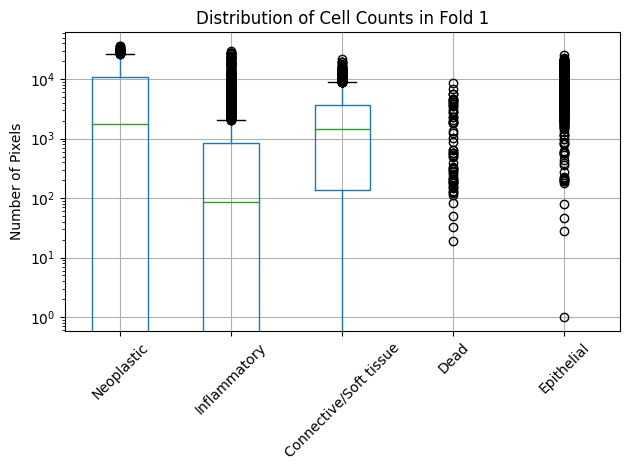


Fold 2 Statistics:
         Neoplastic  Inflammatory  Connective/Soft tissue         Dead  \
count   2523.000000   2523.000000             2523.000000  2523.000000   
mean    5159.768926   1193.985335             2511.591359    41.209671   
std     7055.113874   3280.753328             2886.561140   373.862085   
min        0.000000      0.000000                0.000000     0.000000   
25%        0.000000      0.000000              215.000000     0.000000   
50%      142.000000    126.000000             1582.000000     0.000000   
75%     9359.500000    802.000000             3811.500000     0.000000   
max    35904.000000  28639.000000            20051.000000  6486.000000   

         Epithelial  
count   2523.000000  
mean    1671.196988  
std     4047.970119  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max    24062.000000  


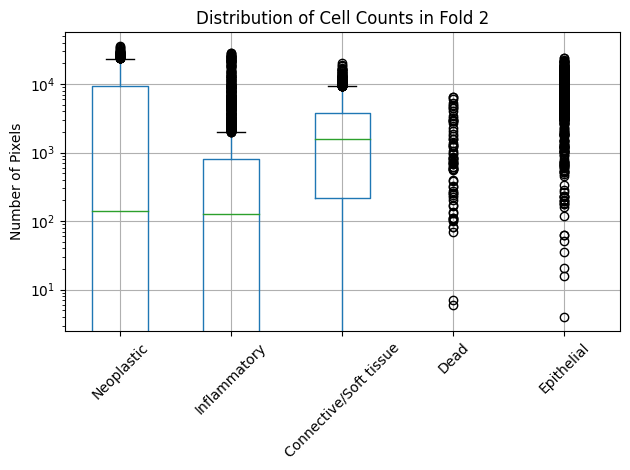


Fold 3 Statistics:
         Neoplastic  Inflammatory  Connective/Soft tissue         Dead  \
count   2722.000000   2722.000000             2722.000000  2722.000000   
mean    5920.042616   1124.626378             2414.153564    51.528288   
std     7646.215507   3148.476722             2970.609307   412.363406   
min        0.000000      0.000000                0.000000     0.000000   
25%        0.000000      0.000000              176.250000     0.000000   
50%     1175.500000     85.000000             1388.000000     0.000000   
75%    10996.750000    724.500000             3484.250000     0.000000   
max    37160.000000  31139.000000            22264.000000  6872.000000   

         Epithelial  
count   2722.000000  
mean    1592.581925  
std     4068.389534  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max    30723.000000  


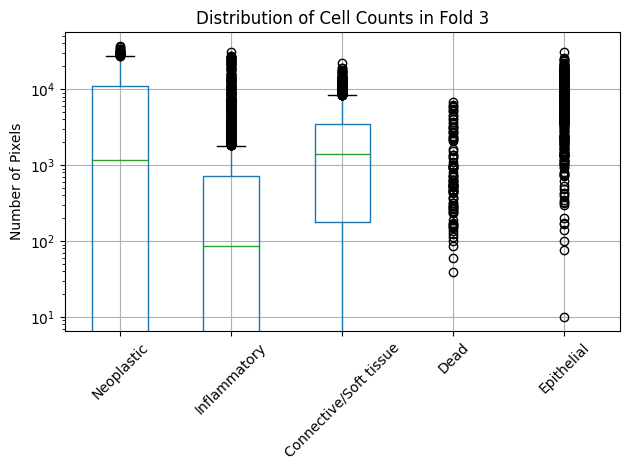


Overall Dataset Statistics:
         Neoplastic  Inflammatory  Connective/Soft tissue         Dead  \
count   7901.000000   7901.000000             7901.000000  7901.000000   
mean    5676.631312   1162.953930             2449.046576    45.313631   
std     7429.700811   3215.774554             2927.739733   401.259218   
min        0.000000      0.000000                0.000000     0.000000   
25%        0.000000      0.000000              172.000000     0.000000   
50%     1006.000000    101.000000             1472.000000     0.000000   
75%    10421.000000    796.000000             3658.000000     0.000000   
max    37160.000000  31139.000000            22264.000000  8711.000000   

         Epithelial  
count   7901.000000  
mean    1622.976712  
std     4052.126663  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max    30723.000000  


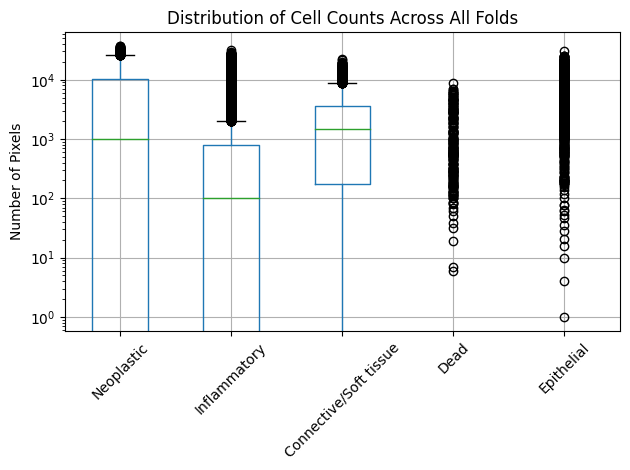


Percentage of Images Containing Each Cell Type:
Neoplastic                53.043918
Inflammatory              52.297178
Connective/Soft tissue    77.711682
Dead                       2.936337
Epithelial                19.339324
dtype: float64


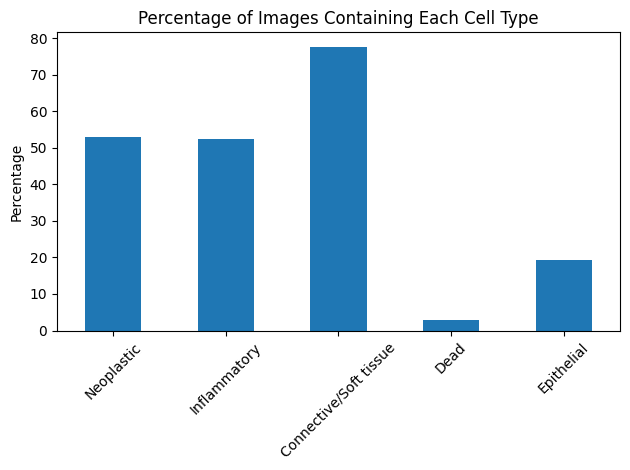

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def analyze_fold(mask_file):
    masks = np.load(mask_file, allow_pickle=True)
    
    all_counts = []
    for mask in masks:
        # Count non-zero pixels for each channel
        counts = [np.count_nonzero(mask[..., i]) for i in range(5)]  # 5 cell classes
        all_counts.append(counts)
    
    return np.array(all_counts)

def generate_statistics(base_dir):
    fold_files = [
        f"{base_dir}/Fold 1/masks/fold1/masks.npy",
        f"{base_dir}/Fold 2/masks/fold2/masks.npy",
        f"{base_dir}/Fold 3/masks/fold3/masks.npy"
    ]
    
    class_names = ['Neoplastic', 'Inflammatory', 'Connective/Soft tissue', 'Dead', 'Epithelial']
    
    all_fold_data = []
    for i, file in enumerate(fold_files, 1):
        fold_data = analyze_fold(file)
        all_fold_data.append(fold_data)
        
        # Create DataFrame for each fold
        df = pd.DataFrame(fold_data, columns=class_names)
        print(f"\nFold {i} Statistics:")
        print(df.describe())
        
        # Plot distribution for each class in the fold
        df.boxplot(column=class_names)
        plt.title(f'Distribution of Cell Counts in Fold {i}')
        plt.ylabel('Number of Pixels')
        plt.yscale('log')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

    # Combine all folds
    all_data = np.concatenate(all_fold_data)
    
    # Create overall DataFrame
    df_all = pd.DataFrame(all_data, columns=class_names)
    
    print("\nOverall Dataset Statistics:")
    print(df_all.describe())
    
    # Plot overall distribution
    df_all.boxplot(column=class_names)
    plt.title('Distribution of Cell Counts Across All Folds')
    plt.ylabel('Number of Pixels')
    plt.yscale('log')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    # Calculate percentage of images with each cell type
    presence = (df_all > 0).mean() * 100
    print("\nPercentage of Images Containing Each Cell Type:")
    print(presence)
    
    # Plot percentage of images with each cell type
    presence.plot(kind='bar')
    plt.title('Percentage of Images Containing Each Cell Type')
    plt.ylabel('Percentage')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Base directory of your dataset
base_dir = '/rsrch5/home/plm/yshokrollahi/vitamin-p/vitamin-p/data/raw/H&E'

# Generate statistics
generate_statistics(base_dir)